In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlp

bank=pd.read_csv(r'C:/Users\deepajay\Downloads/bank-full.csv')
print(bank)
print('----'*10)
print(bank.keys())
print('----'*10)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [83]:
print(bank.head().T)
print('----'*10)
print(bank.shape)
print('----'*10)
print(bank.columns)
print('----'*10)
print(bank.dtypes)
print('----'*10)

                    0           1             2            3        4
age                58          44            33           47       33
job        management  technician  entrepreneur  blue-collar  unknown
marital       married      single       married      married   single
education    tertiary   secondary     secondary      unknown  unknown
default            no          no            no           no       no
balance          2143          29             2         1506        1
housing           yes         yes           yes          yes       no
loan               no          no           yes           no       no
contact       unknown     unknown       unknown      unknown  unknown
day                 5           5             5            5        5
month             may         may           may          may      may
duration          261         151            76           92      198
campaign            1           1             1            1        1
pdays              -

In [84]:
for i in bank.columns:
    print(i)
    print(bank[i].unique())
    print('------'*10)

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
------------------------------------------------------------
housing
['yes' 'no']
-----------------------------------------------------

In [85]:
numerical_cols = list(bank.select_dtypes(exclude=['object']))
print("object")
print(numerical_cols)
print('------'*10)
category_cols = list(bank.select_dtypes(include=['object']))
print("categrorical")
print(category_cols)
print('------'*10)

object
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
------------------------------------------------------------
categrorical
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
------------------------------------------------------------


C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

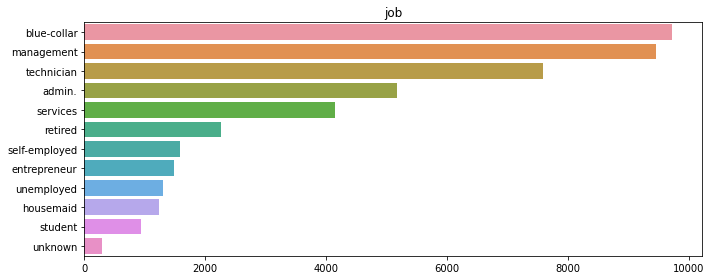

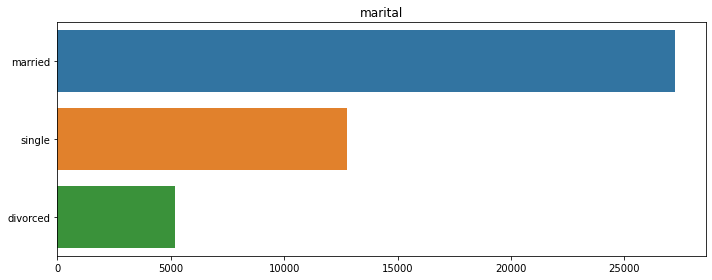

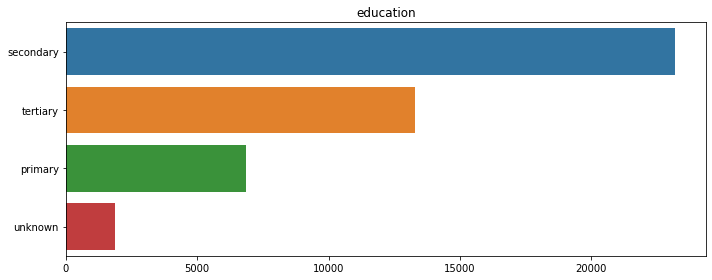

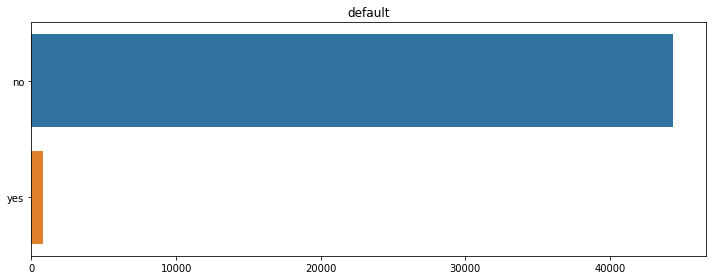

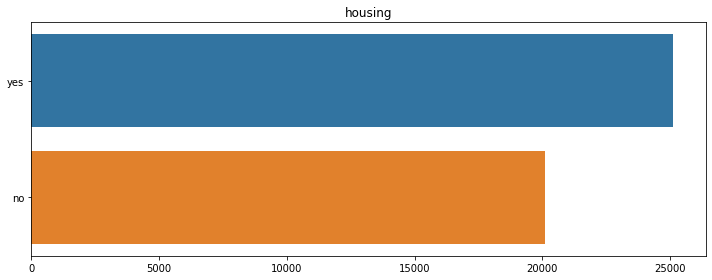

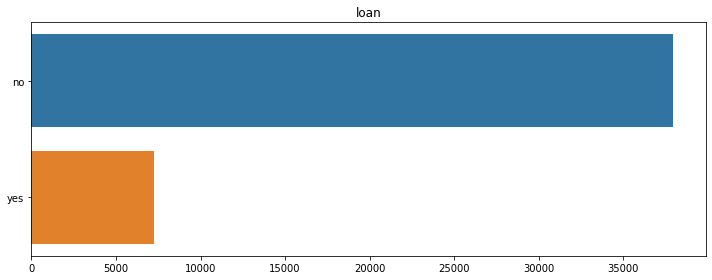

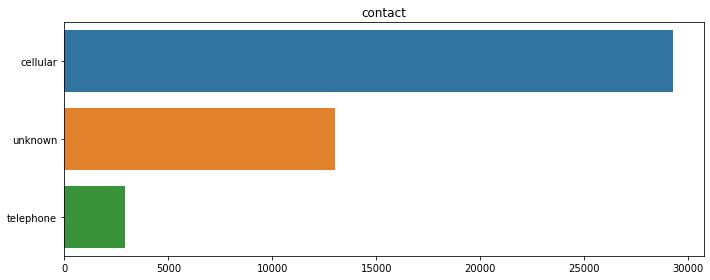

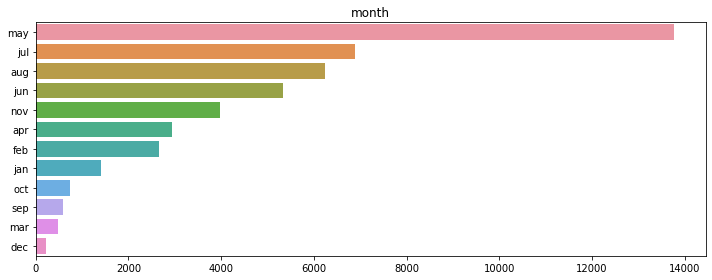

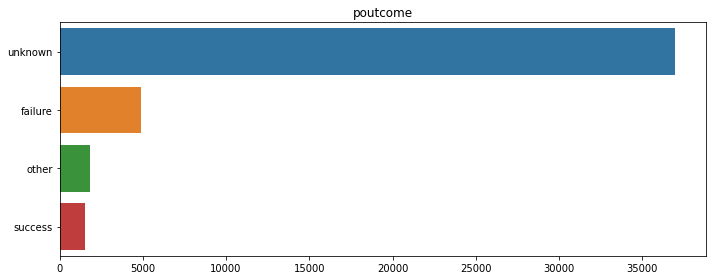

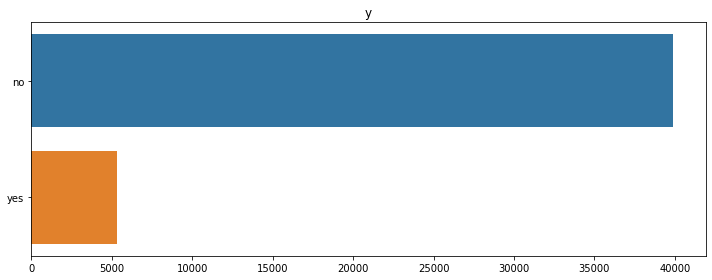

In [86]:
for col in category_cols:
    mlp.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    mlp.title(col)
    mlp.tight_layout()

C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

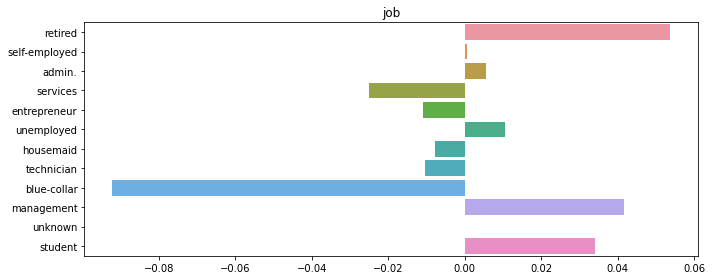

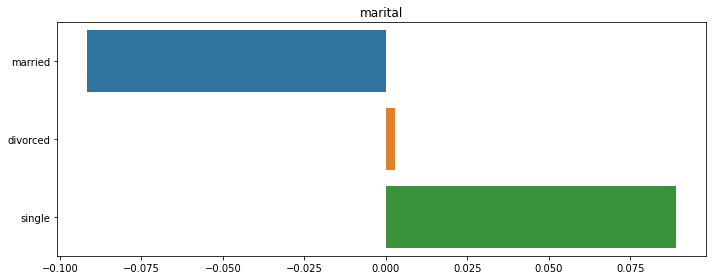

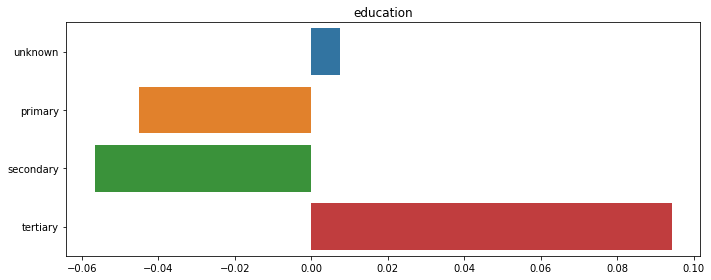

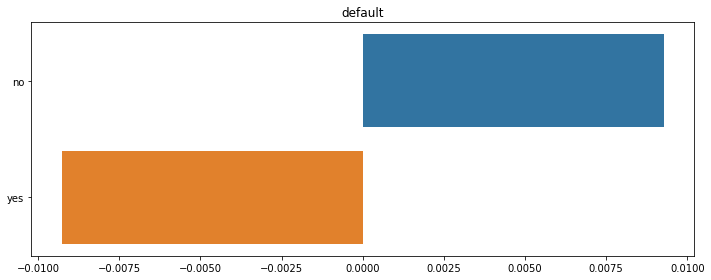

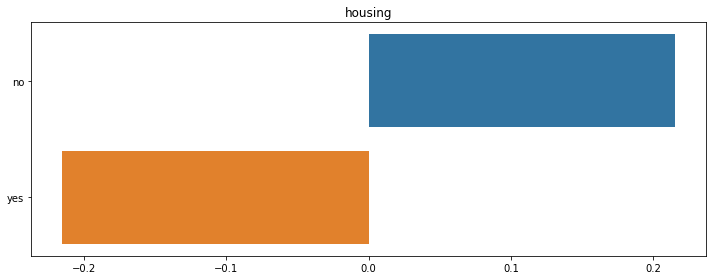

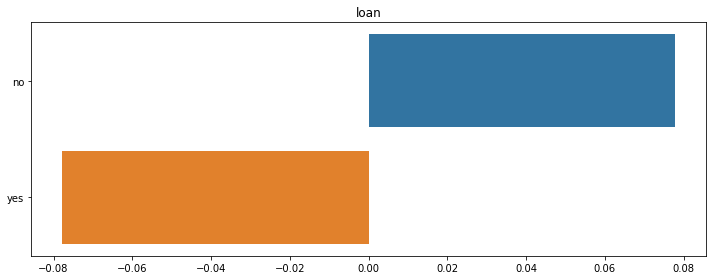

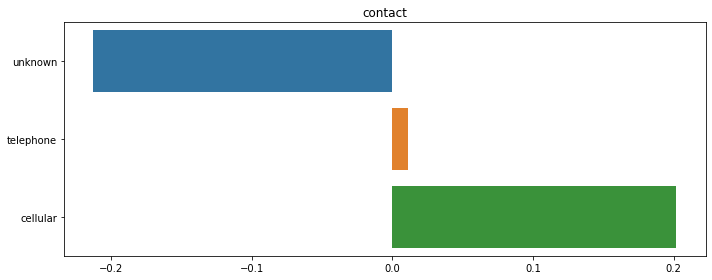

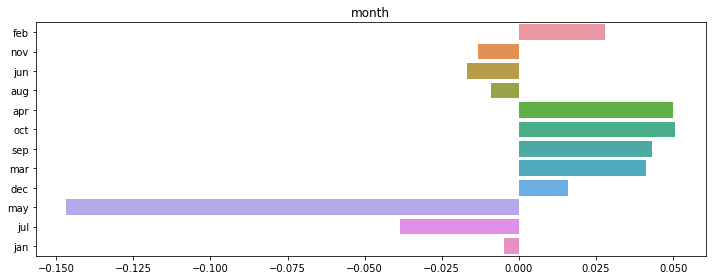

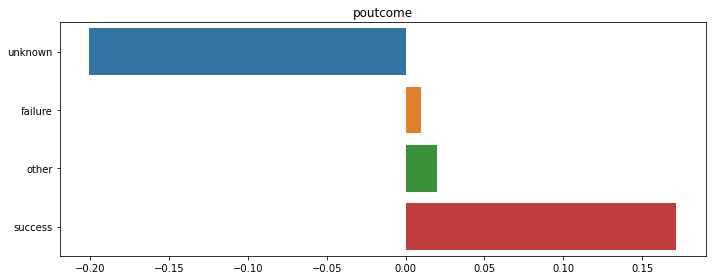

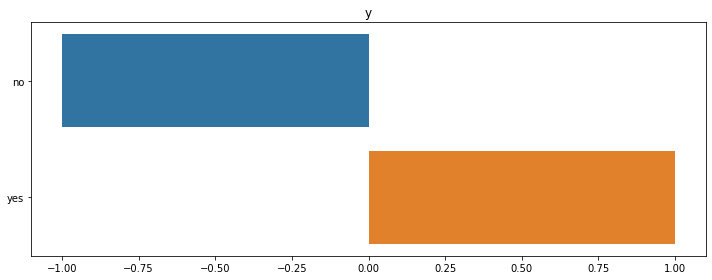

In [87]:
for col in category_cols:
    mlp.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = bank.loc[bank.y.values == 'yes', col].value_counts() 
    neg_counts = bank.loc[bank.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (bank.y.values == 'yes').sum()
    freq_neg = (bank.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

<AxesSubplot:>

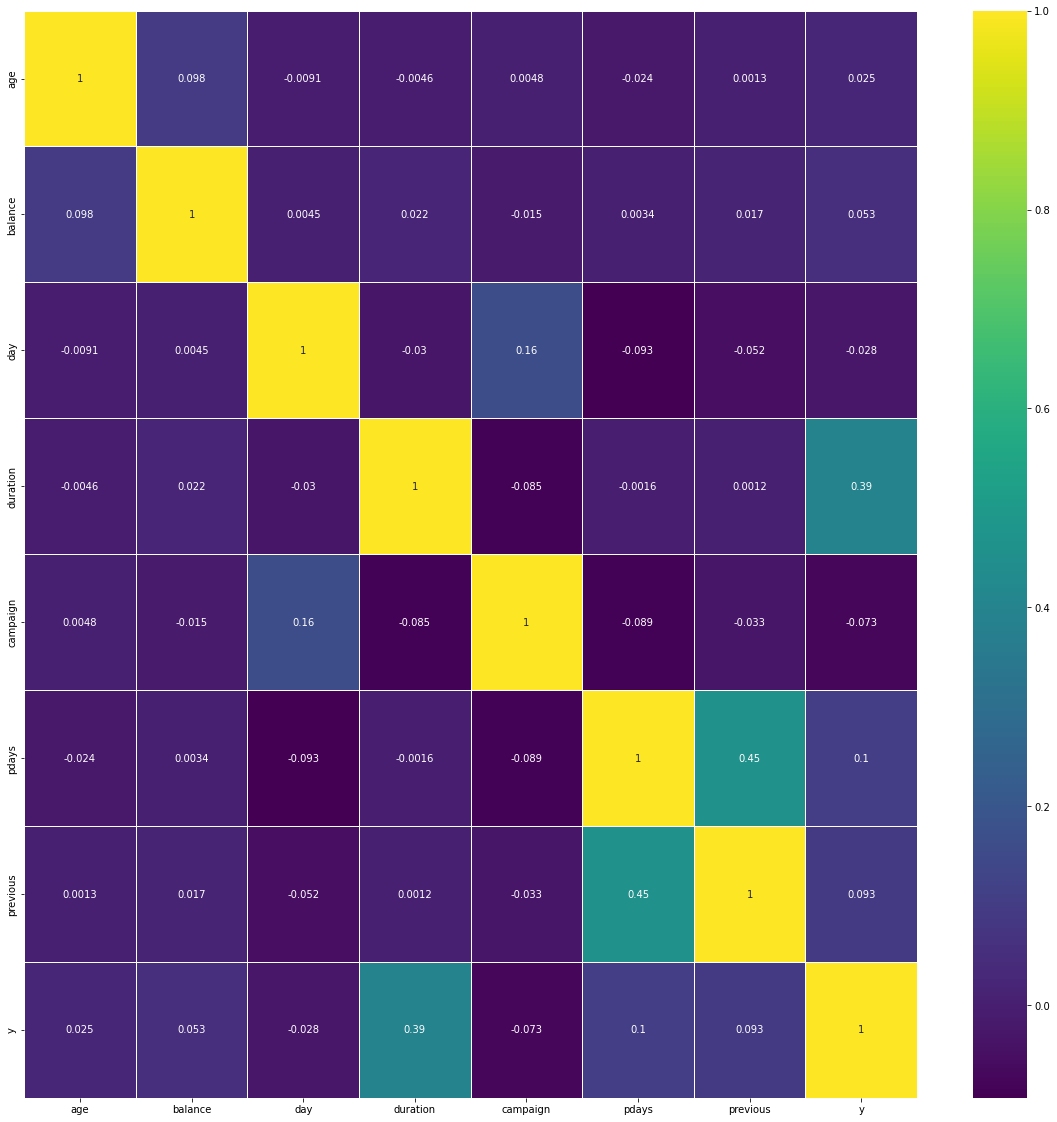

In [88]:
# bank.default.replace('unknown','no',inplace=True)
# bank['default'] = bank.default.replace('unknown',bank.default.mode([0]))
# bank.housing.replace('unknown',bank.housing.mode()[0],inplace=True)
# bank['loan'] = bank.default.replace('unknown',bank.loan.mode()[0])


bank.loc[(bank['age']>60) & (bank['job']=='unknown'), 'job'] = 'retired'
bank.loc[(bank['education']=='unknown') & (bank['job']=='management'), 'education'] = 'university.degree'
bank.loc[(bank['education']=='unknown') & (bank['job']=='services'), 'education'] = 'high.school'
bank.loc[(bank['education']=='unknown') & (bank['job']=='housemaid'), 'education'] = 'basic.4y'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.4y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.6y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.9y'), 'job'] = 'blue-collar'
bank.loc[(bank['job']=='unknown') & (bank['education']=='professional.course'), 'job'] = 'technician'
bank['pdays'] = np.where(bank['pdays'] == 999,bank[bank['pdays'] < 999]['pdays'].mean(),bank['pdays'])
bank['y'].replace({'no':0,'yes':1},inplace=True)
fig, ax = mlp.subplots(figsize=(20,20))
sns.heatmap(bank.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

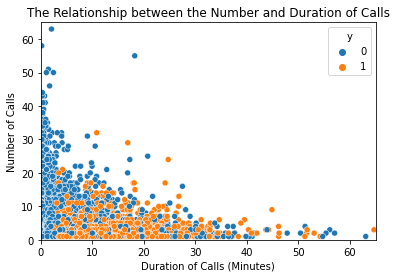

In [89]:
#using Scatter
bank['duration'] = bank['duration'].apply(lambda n:n/60).round(2)
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,hue = 'y')
mlp.axis([0,65,0,65])
mlp.ylabel('Number of Calls')
mlp.xlabel('Duration of Calls (Minutes)')
mlp.title('The Relationship between the Number and Duration of Calls')
mlp.show()

In [94]:
#dropped 290 rows
#drop call duration less than 10second 
#[df.duration < 10/60]
bank = bank.drop(bank[bank.duration < 10/60].index, axis = 0, inplace = False)
bank = bank.drop(bank[bank.duration < 10/60].index, axis = 0, inplace = False)
print(bank.duration)
#putting age into bins
bank.loc[bank["age"] < 30,  'age'] = 20
bank.loc[(bank["age"] >= 30) & (bank["age"] <= 39), 'age'] = 30
bank.loc[(bank["age"] >= 40) & (bank["age"] <= 49), 'age'] = 40
bank.loc[(bank["age"] >= 50) & (bank["age"] <= 59), 'age'] = 50
bank.loc[bank["age"] >= 60, 'age'] = 60
bank['pdays'] = np.where(bank['pdays'] == 999,bank[bank['pdays'] < 999]['pdays'].mean(),bank['pdays'])
print(bank.age)

0         4.35
1         2.52
2         1.27
3         1.53
4         3.30
         ...  
45206    16.28
45207     7.60
45208    18.78
45209     8.47
45210     6.02
Name: duration, Length: 44869, dtype: float64
0        50
1        40
2        30
3        40
4        30
         ..
45206    50
45207    60
45208    60
45209    50
45210    30
Name: age, Length: 44869, dtype: int64
